In [13]:
# compare_countries.ipynb - Task 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from pathlib import Path
import os

# Load and parse Timestamp column as datetime
benin = pd.read_csv("../data/benin_clean.csv", parse_dates=["Timestamp"])
sierra = pd.read_csv("../data/sierraleone_clean.csv", parse_dates=["Timestamp"])
togo = pd.read_csv("../data/togo_clean.csv", parse_dates=["Timestamp"])

# Add country labels
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierraleone'
togo['Country'] = 'Togo'

# Set Timestamp as index
benin.set_index("Timestamp", inplace=True)
sierra.set_index("Timestamp", inplace=True)
togo.set_index("Timestamp", inplace=True)

# Keep only numeric columns for averaging
benin_numeric = benin.select_dtypes(include='number')
sierra_numeric = sierra.select_dtypes(include='number')
togo_numeric = togo.select_dtypes(include='number')

# Daily mean
benin_daily = benin_numeric.resample('D').mean()
sierra_daily = sierra_numeric.resample('D').mean()
togo_daily = togo_numeric.resample('D').mean()


# Verify results
print(benin_daily.head())
print(sierra_daily.head())
print(togo_daily.head())

# --- Combine ---
df_all = pd.concat([benin_daily.assign(Country='Benin'),
                    sierra_daily.assign(Country='Sierra Leone'),
                    togo_daily.assign(Country='Togo')])

# --- Summary table (mean, median, std) for GHI, DNI, DHI by country ---
summary = df_all.groupby('Country')[['GHI','DNI','DHI']].agg(['mean','median','std'])
summary = summary.round(2)
print(summary)

# Ensure reports directory exists then save summary to CSV for report
reports_dir = Path('reports')
reports_dir.mkdir(parents=True, exist_ok=True)

summary.to_csv(reports_dir / 'summary_countries_stats.csv')


                   GHI         DNI         DHI        ModA        ModB  \
Timestamp                                                                
2021-08-09  449.212912  160.612121  313.391700  410.979578  411.896047   
2021-08-10  409.957012  226.198427  218.733814  374.510092  375.385583   
2021-08-11  187.552576    1.989036  185.258520  183.261427  182.955482   
2021-08-12  399.270828  197.774901  266.580683  358.298029  357.787648   
2021-08-13  244.458391   10.186269  232.859778  243.338696  243.085437   

                 Tamb         RH        WS    WSgust   WSstdev          WD  \
Timestamp                                                                    
2021-08-09  29.550988  72.182082  2.279183  3.091304  0.540843  183.142424   
2021-08-10  30.034862  72.363958  2.647182  3.434076  0.519135  226.432896   
2021-08-11  26.443725  87.794188  2.671995  3.549406  0.569617  206.738045   
2021-08-12  28.450329  76.926544  2.362681  3.184494  0.549934  184.660184   
2021-08-13  2

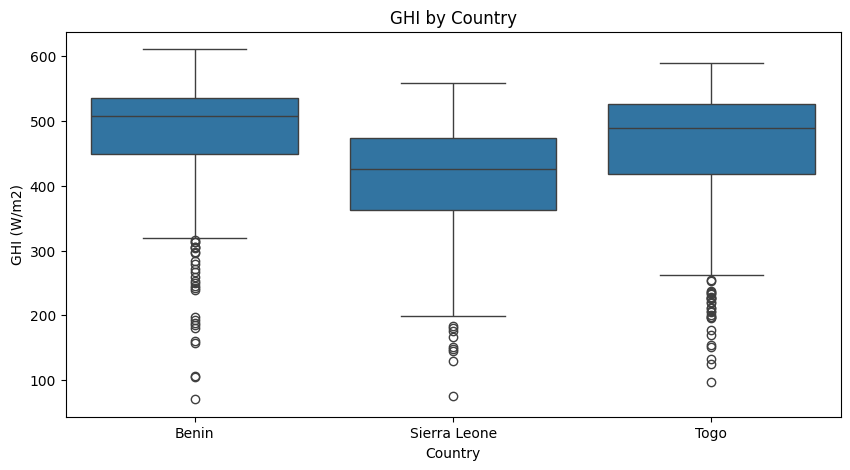

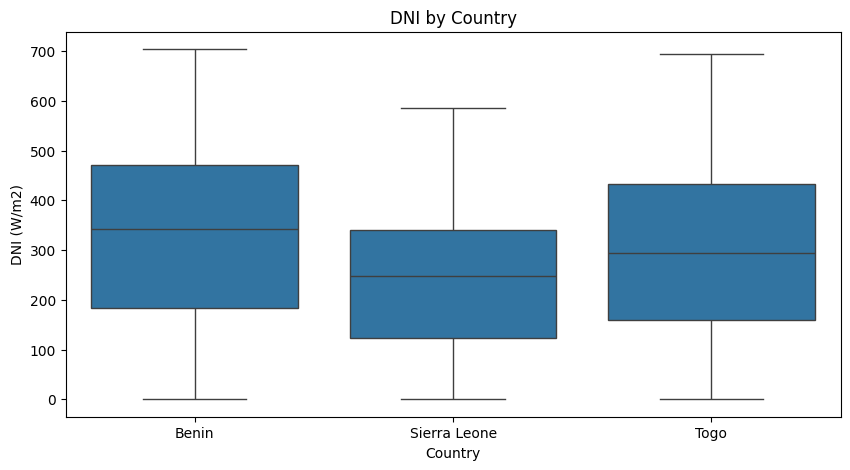

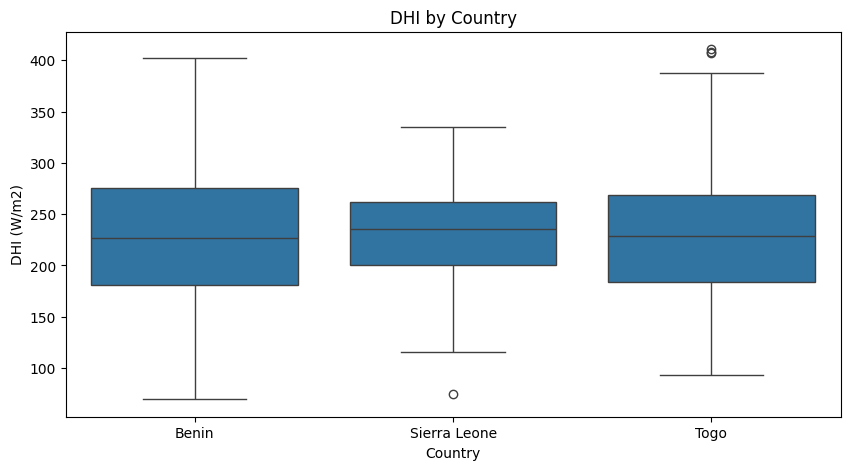

In [14]:
# --- Boxplots for each metric ---
plt.figure(figsize=(10,5))
sns.boxplot(x='Country', y='GHI', data=df_all)
plt.title('GHI by Country')
plt.ylabel('GHI (W/m2)')
plt.savefig('reports/boxplot_GHI.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='Country', y='DNI', data=df_all)
plt.title('DNI by Country')
plt.ylabel('DNI (W/m2)')
plt.savefig('reports/boxplot_DNI.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='Country', y='DHI', data=df_all)
plt.title('DHI by Country')
plt.ylabel('DHI (W/m2)')
plt.savefig('reports/boxplot_DHI.png', bbox_inches='tight')
plt.show()

ANOVA F-statistic: 53.453, p-value: 0.00000


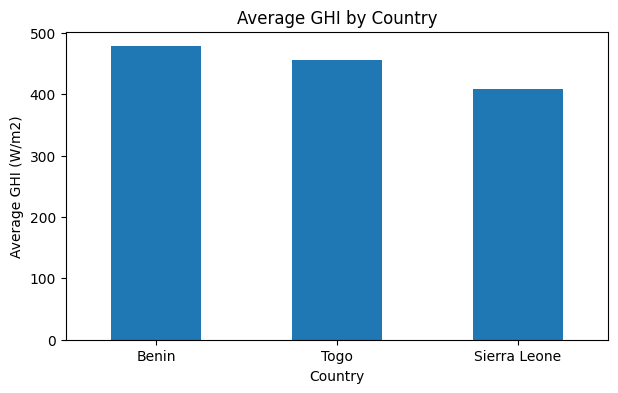

In [15]:
# --- Statistical test: One-way ANOVA on GHI ---
f_stat, p_val = f_oneway(
    df_all.loc[df_all['Country']=='Benin','GHI'],
    df_all.loc[df_all['Country']=='Sierra Leone','GHI'],
    df_all.loc[df_all['Country']=='Togo','GHI']
)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_val:.5f}")

# --- Bar chart ranking by average GHI ---
mean_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
plt.figure(figsize=(7,4))
mean_ghi.plot(kind='bar')
plt.title('Average GHI by Country')
plt.ylabel('Average GHI (W/m2)')
plt.xticks(rotation=0)
plt.savefig('reports/avg_GHI_ranking.png', bbox_inches='tight')
plt.show()


In [16]:

# --- Key observations for notebook ---
observations = [
    "Write 3 bullet points here about which country has highest median, which has largest spread, and whether ANOVA p-value indicates significant differences."
]
print('\n'.join(observations))


Write 3 bullet points here about which country has highest median, which has largest spread, and whether ANOVA p-value indicates significant differences.
